In [1]:
import pandas_datareader as pdr
import pandas as pd

In [2]:
def get_data():
    temp = pdr.get_data_yahoo('INFY')
    temp.to_csv('C:\Codes\Time-Series\Data\infosys.csv')
    return True
get_data() #To work with data extracted.

True

# EDA

In [3]:
df = pd.read_csv('C:\Codes\Time-Series\Data\infosys.csv')
df.index = pd.to_datetime(df['Date'], format = "%Y.%m.%d")
df.drop(columns='Date', inplace=True)
print(df.head())

             High    Low   Open  Close      Volume  Adj Close
Date                                                         
2017-07-11  7.740  7.635  7.710  7.735  10745200.0   6.753396
2017-07-12  7.830  7.710  7.750  7.820  21274600.0   6.827609
2017-07-13  7.825  7.735  7.775  7.780  20329000.0   6.792685
2017-07-14  7.965  7.750  7.775  7.835  23331800.0   6.840705
2017-07-17  7.870  7.730  7.860  7.820  14512400.0   6.827609


In [4]:
print(df.tail())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2022-07-05  18.690001  18.360001  18.510000  18.670000  10265200.0  18.670000
2022-07-06  19.020000  18.700001  18.700001  18.930000   8860200.0  18.930000
2022-07-07  19.180000  18.900000  18.990000  19.160000   9675500.0  19.160000
2022-07-08  19.160000  18.760000  19.049999  19.059999  15835100.0  19.059999
2022-07-11  18.590000  18.225000  18.500000  18.504999   5042138.0  18.504999


In [5]:
print(df.describe())

              High          Low         Open        Close        Volume  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03   
mean     13.592681    13.362812    13.477073    13.480826  1.047189e+07   
std       5.507466     5.419261     5.464524     5.466195  6.563593e+06   
min       7.155000     6.760000     6.920000     6.940000  1.320600e+06   
25%       9.370000     9.167500     9.250000     9.265000  6.521750e+06   
50%      10.870000    10.720000    10.810000    10.770000  8.881400e+06   
75%      18.514999    18.165000    18.335000    18.345000  1.251225e+07   
max      26.389999    25.580000    26.150000    26.200001  7.716540e+07   

         Adj Close  
count  1259.000000  
mean     12.849434  
std       5.664776  
min       6.225173  
25%       8.571565  
50%       9.996184  
75%      17.871861  
max      25.910423  


In [6]:
print(df.isnull().any(axis=0))  #No null values.

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool


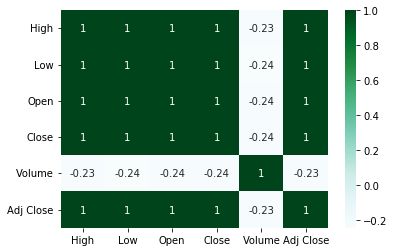

In [8]:
import seaborn as sns
sns.heatmap(df.corr(), cmap = 'BuGn', annot=True)

In [9]:
#We are only going to be working with the close value.
df.drop(columns=['Volume','High','Low','Open','Adj Close'], inplace=True)

In [10]:
df.head()

,Close
Date,
2017-07-11,7.735
2017-07-12,7.820
2017-07-13,7.780
2017-07-14,7.835
2017-07-17,7.820


In [11]:
#Saving it to a different csv file.
df.to_csv('C:\Codes\Time-Series\Data\closeInfosys.csv')

# Data-Preprocessing

In [12]:
closeDF = pd.read_csv('C:\Codes\Time-Series\Data\closeInfosys.csv')
print(closeDF.head())

         Date  Close
0  2017-07-11  7.735
1  2017-07-12  7.820
2  2017-07-13  7.780
3  2017-07-14  7.835
4  2017-07-17  7.820


In [13]:
closeDF.set_index(closeDF['Date'],drop=True, inplace=True)

In [14]:
closeDF.drop(columns='Date', inplace=True)

In [15]:
print(closeDF.head())

            Close
Date             
2017-07-11  7.735
2017-07-12  7.820
2017-07-13  7.780
2017-07-14  7.835
2017-07-17  7.820


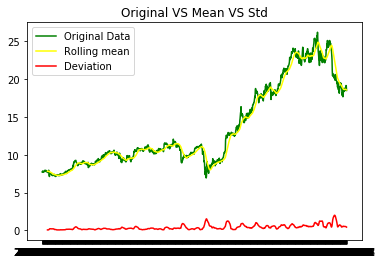

In [37]:
#Getting the moving average and deviation.
data_mean = closeDF['Close'].rolling(window=23).mean()
data_std = closeDF['Close'].rolling(window=23).std()

#Plotting the results.
from matplotlib import pyplot as plt
plt.plot(closeDF['Close'], color='green', label='Original Data')
plt.plot(data_mean, color="yellow", label="Rolling mean")
plt.plot(data_std, color='red', label='Deviation')
plt.legend(loc='best')
plt.title('Original VS Mean VS Std')
plt.show()

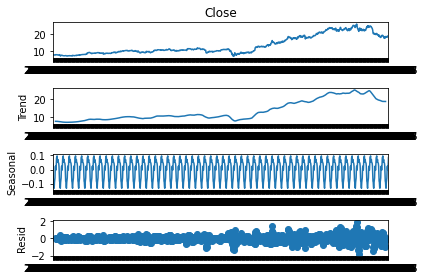

In [16]:
#We have to make the data stationary now.
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(closeDF['Close'], model='additive', period = 23)
decompose.plot()
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(closeDF['Close']).reshape(-1,1))
print(df1.shape)

(1259, 1)


In [17]:
closeDF.dropna(inplace=True)

In [18]:
def split_data(data):
    train_size = int(len(data) * 0.75)
    test_size = int(len(data) - train_size)
    train_data, test_data = data[0:train_size,:],data[train_size:len(df1),:1]
    print(train_size, test_size)
    return train_data, test_data

In [19]:
X,Y = split_data(df1)

944 315


In [20]:
np.savetxt('C:\\Codes\\Time-Series\\Data\\train_data.csv', X)
np.savetxt('C:\\Codes\\Time-Series\\Data\\test_data.csv', Y)

In [21]:
x = pd.read_csv("C:\\Codes\\Time-Series\\Data\\train_data.csv")
y = pd.read_csv("C:\\Codes\\Time-Series\\Data\\test_data.csv")

In [22]:
def dataset_matrix(dataset, timestep):
    X_data, Y_data = [], []
    for i in range(len(dataset)-timestep-1):
        flag_X = dataset.iloc[i:(i+timestep), 0]
        flag_Y = dataset.iloc[(i+timestep),0]
        X_data.append(flag_X)
        Y_data.append(flag_Y)
    return np.array(X_data), np.array(Y_data)

In [23]:
timestep = 22
Xtrain, Ytrain = dataset_matrix(x, timestep)
Xtest, Ytest = dataset_matrix(y, timestep)

In [24]:
print(Xtrain.shape,'\n',Ytrain.shape,'\n',Xtest.shape,'\n',Ytest.shape)

(920, 22) 
 (920,) 
 (291, 22) 
 (291,)


In [25]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], Xtrain.shape[1], 1)
Xtest = Xtest.reshape(Xtest.shape[0], Xtest.shape[1], 1)

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(22,1)))
model.add(Dropout(0.5))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(25, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 22, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 22, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 22, 50)            30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2

In [27]:
from keras.callbacks import CSVLogger, ModelCheckpoint,EarlyStopping
csv_logger = CSVLogger('training.log', separator = ';')
checkpoint = ModelCheckpoint('lstm_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)
early = EarlyStopping(monitor = 'val_loss', patience = 10)

In [28]:
model.fit(Xtrain, Ytrain, validation_data = (Xtest, Ytest), epochs = 50, batch_size = 32,verbose=1, callbacks=[csv_logger, checkpoint])

Epoch 1/50
29/29 [==============================] - 13s 130ms/step - loss: 0.0091 - val_loss: 0.0064

Epoch 00001: val_loss improved from inf to 0.00637, saving model to lstm_model.h5
Epoch 2/50
29/29 [==============================] - 1s 41ms/step - loss: 0.0021 - val_loss: 0.0039

Epoch 00002: val_loss improved from 0.00637 to 0.00387, saving model to lstm_model.h5
Epoch 3/50
29/29 [==============================] - 1s 47ms/step - loss: 0.0020 - val_loss: 0.0030

Epoch 00003: val_loss improved from 0.00387 to 0.00305, saving model to lstm_model.h5
Epoch 4/50
29/29 [==============================] - 1s 40ms/step - loss: 0.0019 - val_loss: 0.0035

Epoch 00004: val_loss did not improve from 0.00305
Epoch 5/50
29/29 [==============================] - 1s 40ms/step - loss: 0.0019 - val_loss: 0.0035

Epoch 00005: val_loss did not improve from 0.00305
Epoch 6/50
29/29 [==============================] - 1s 42ms/step - loss: 0.0020 - val_loss: 0.0026

Epoch 00006: val_loss improved from 0.0030

In [29]:
train_predict = model.predict(Xtrain)
test_predict = model.predict(Xtest)

In [30]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [34]:
from keras.losses import MeanSquaredError

metric = MeanSquaredError(reduction='auto', name='mean_squared_error')
metric(Ytrain, train_predict).numpy()

121.044426

In [35]:
metric(Ytest, test_predict).numpy()

449.75665

In [38]:
plt.plot(closeDF['Close'])